4.1 데이터 시각화가 필요한 이유

1) 앤스콤 데이터 집합 불러온 후 그래프 그리기

In [1]:
import seaborn as sns

In [3]:
anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']

<IPython.core.display.Javascript object>


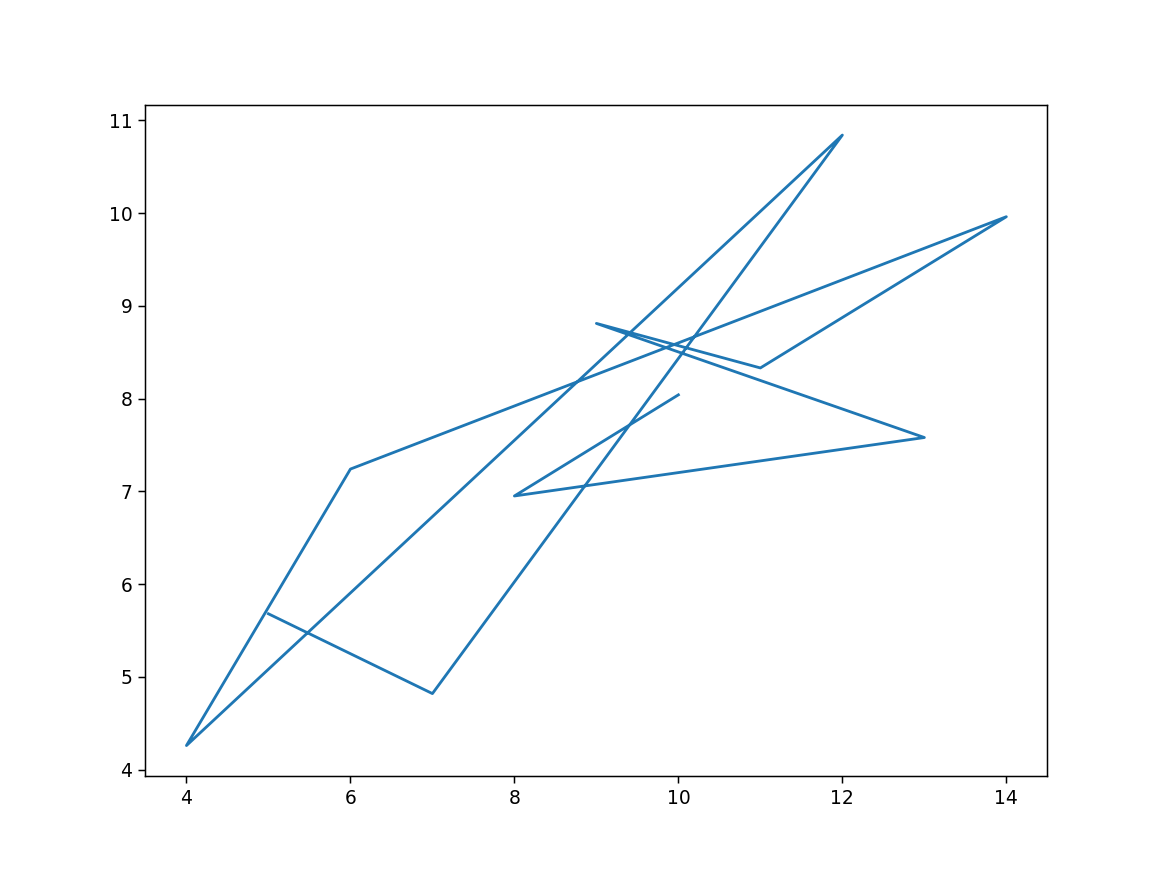

In [8]:
plt.plot(dataset_1['x'], dataset_1['y'])

<IPython.core.display.Javascript object>


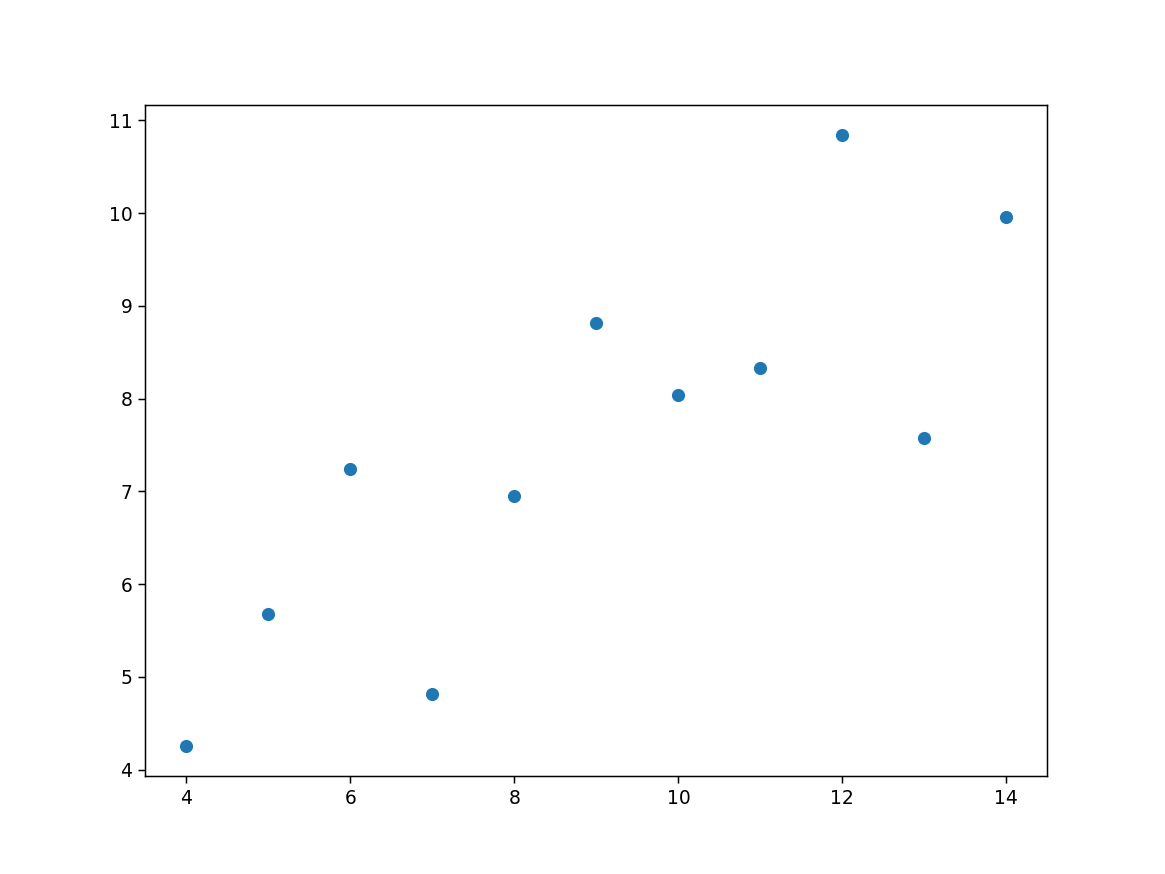

In [9]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

2) 앤스콤 데이터 집합 모두 사용해 그래프 만들기

In [10]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

<IPython.core.display.Javascript object>


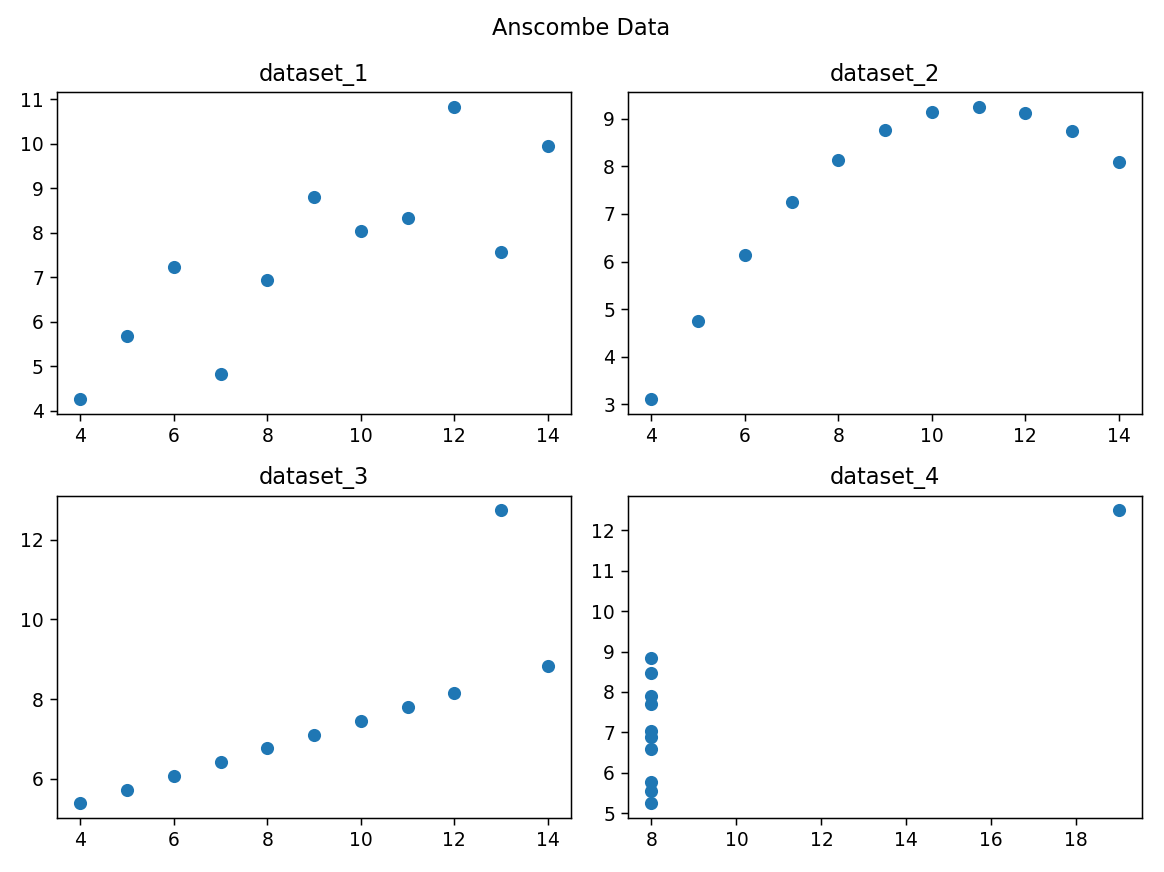

In [22]:
fig = plt.figure() # 기본 틀

axes1 = fig.add_subplot(2,2,1) # 그래프 격자 그리기
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o') # 그래프에 데이터 전달
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

<IPython.core.display.Javascript object>


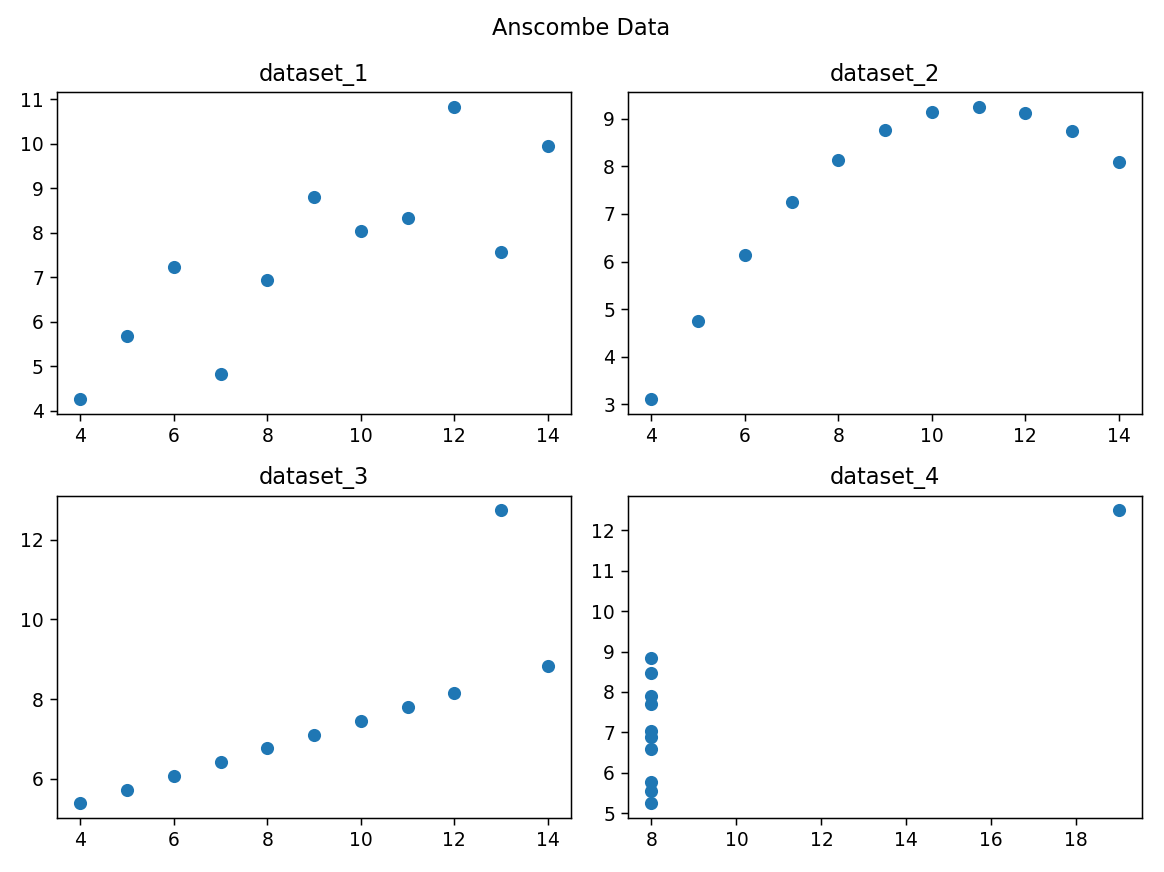

In [23]:
axes1.set_title('dataset_1') # 각 그래프 격자에 제목 추가
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data') # 기본 틀 제목 추가

fig.tight_layout() # 그래프 레이아웃 조절, 정리

fig # 완성 그래프 출력

4.2 matplotlib 라이브러리 자유자재로 사용하기

1) 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [24]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


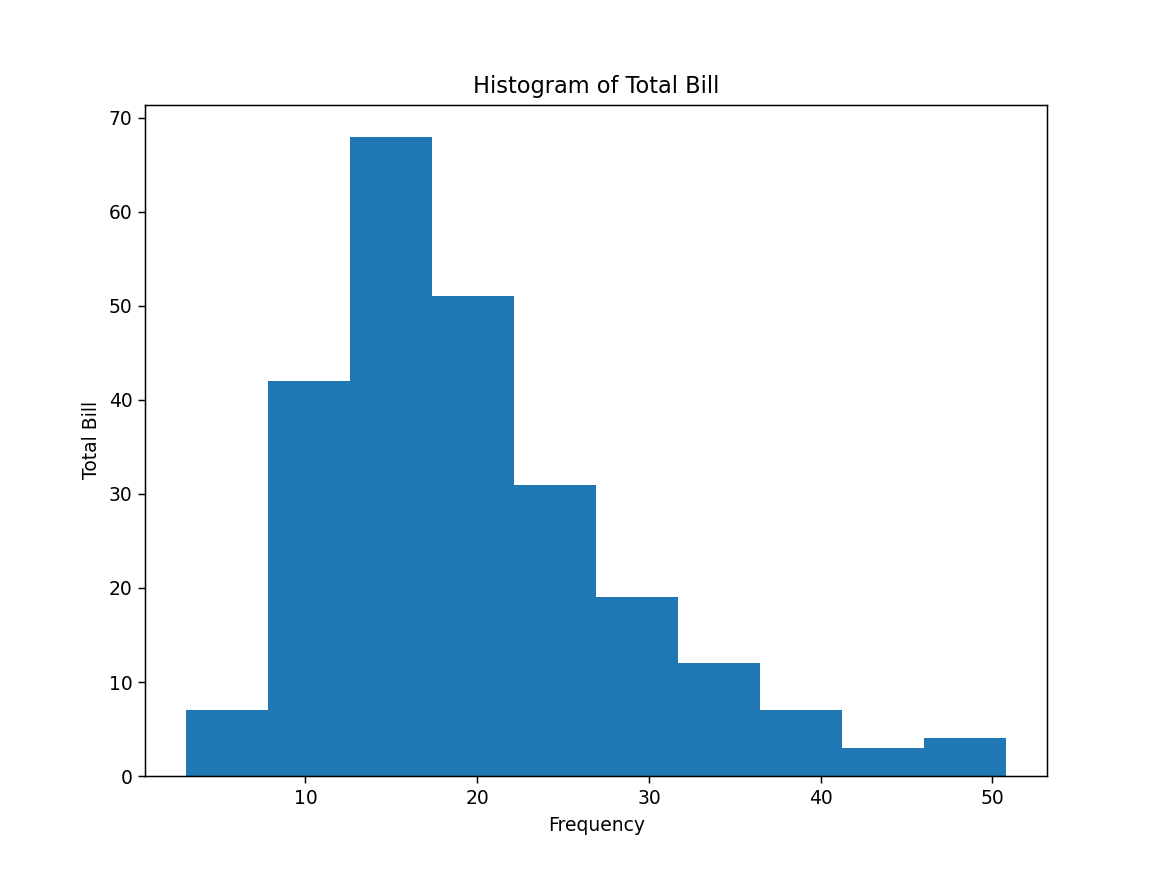

Text(0, 0.5, 'Total Bill')

In [25]:
# 히스토그램
fig = plt.figure() # 기본 틀
axes1 = fig.add_subplot(1,1,1) # 그래프 격자

axes1.hist(tips['total_bill'], bins=10) # axes1에 total_bill 변수 전달

axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


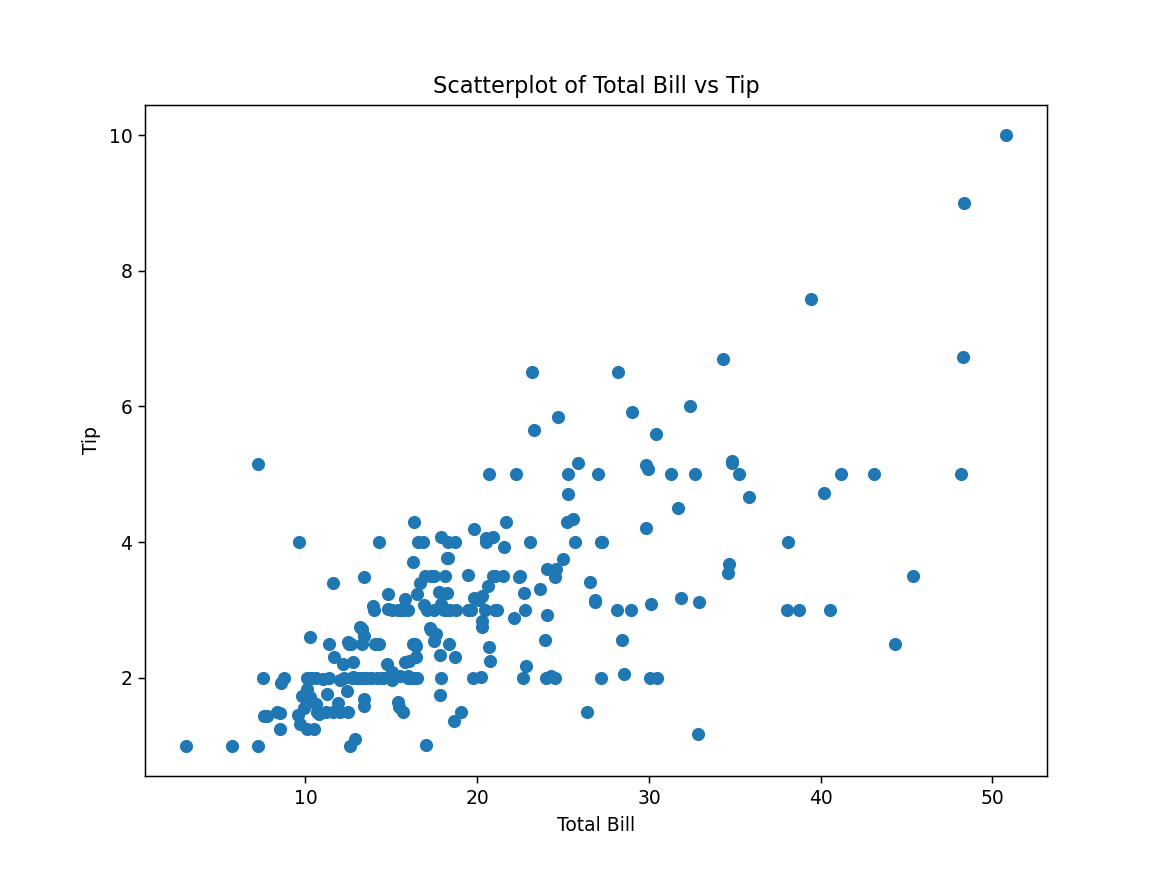

Text(0, 0.5, 'Tip')

In [26]:
# 산점도
scatter_plot = plt.figure() # 기본 틀
axes1 = scatter_plot.add_subplot(1,1,1) # 격자 그래프

axes1.scatter(tips['total_bill'],tips['tip']) # total_bill 변수와 tip 변수의 산점도

axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<IPython.core.display.Javascript object>


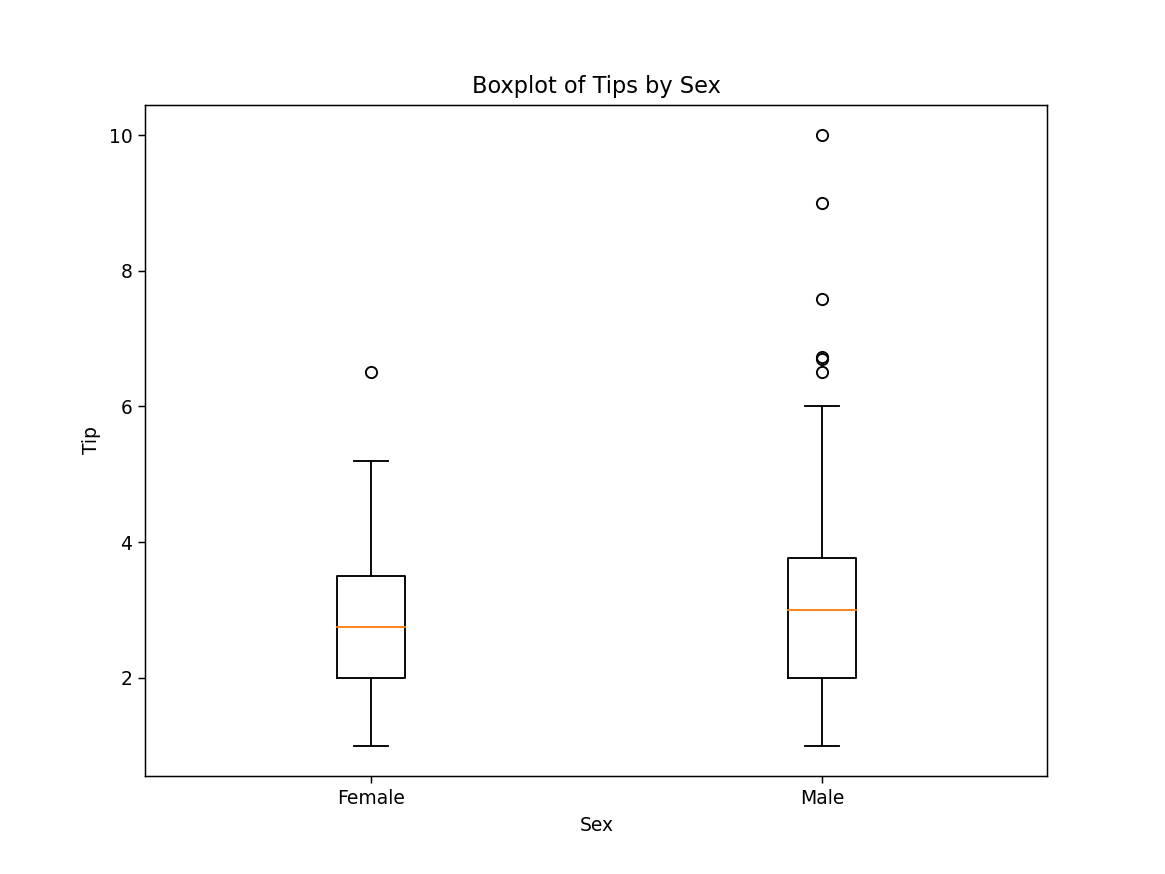

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [27]:
# 박스 그래프(이산형 변수 + 연속형 변수)
boxplot = plt.figure() # 기본 틀
axes1 = boxplot.add_subplot(1,1,1) # 격자 그래프

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex'] == 'Male']['tip']], labels=['Female','Male']) # boxplot

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')


2) 다변량 그래프 그리기 - 산점도

In [28]:
# 산점도 그래프에 성별, 테이블당 인원 수를 새 변수로 추가하기

# 문자열은 색상 지정 불가하므로 문자를 정수 0, 1로 치환하는 함수 사용
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [29]:
# 함수를 적용하여 새로운 변수 sex_color 만들기
tips['sex_color'] = tips['sex'].apply(recode_sex)

<IPython.core.display.Javascript object>


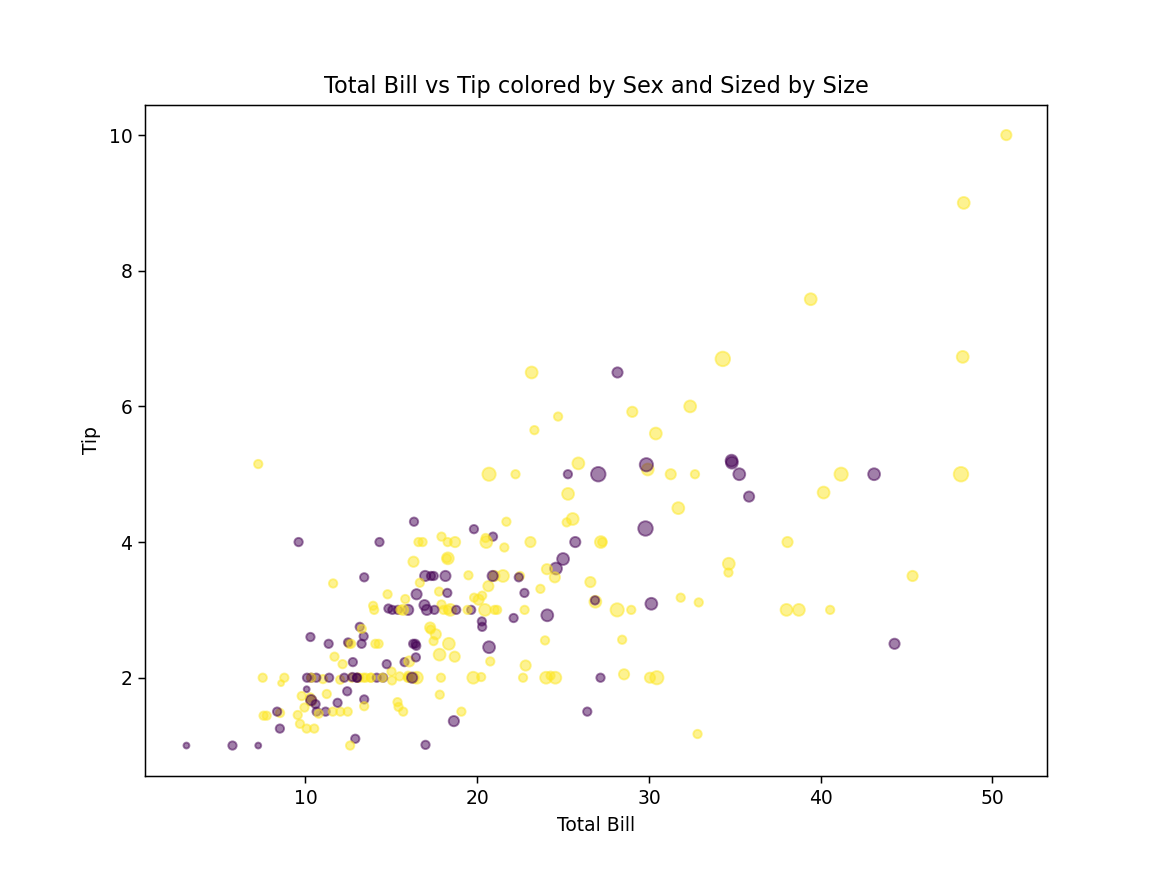

Text(0, 0.5, 'Tip')

In [31]:
# 산점도 그리기
scatter_plot = plt.figure() # 기본 틀
axes1 = scatter_plot.add_subplot(1,1,1) # 격자 그래프

axes1.scatter(x = tips['total_bill'], # 변수 4개에 대한 산점도
             y = tips['tip'],
             c = tips['sex_color'],
             s = tips['size']*10,
             alpha = 0.5)

axes1.set_title('Total Bill vs Tip colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

4.3 seaborn 라이브러리 자유자재로 사용하기

1) 단변량 그래프 그리기 - 히스토그램(+밀집도, 양탄자), count 그래프

In [32]:
import seaborn as sns
tips = sns.load_dataset('tips')

<IPython.core.display.Javascript object>


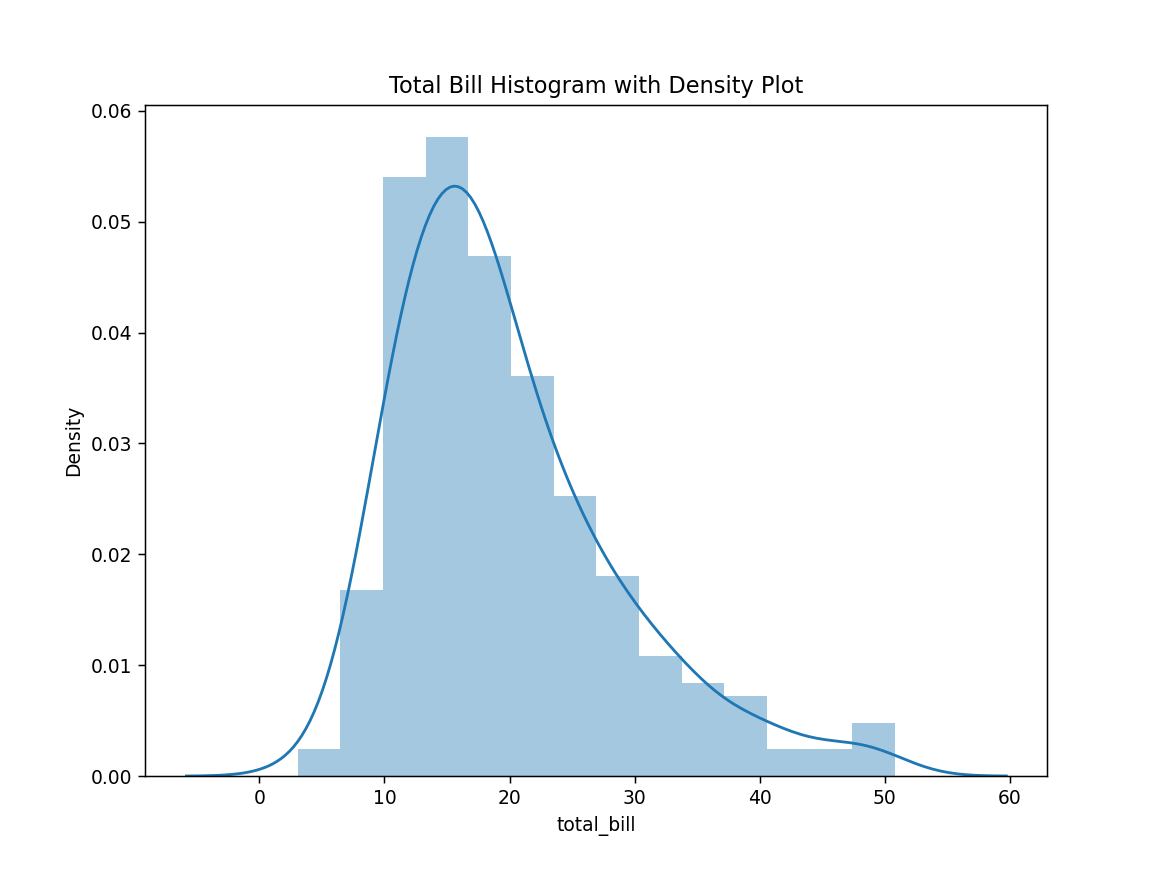

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

In [38]:
# 히스토그램 (+ 밀집도)
ax = plt.subplots() # 기본 틀
ax = sns.distplot(tips['total_bill']) # total_bill 변수 데이터 전달
ax.set_title('Total Bill Histogram with Density Plot')

<IPython.core.display.Javascript object>


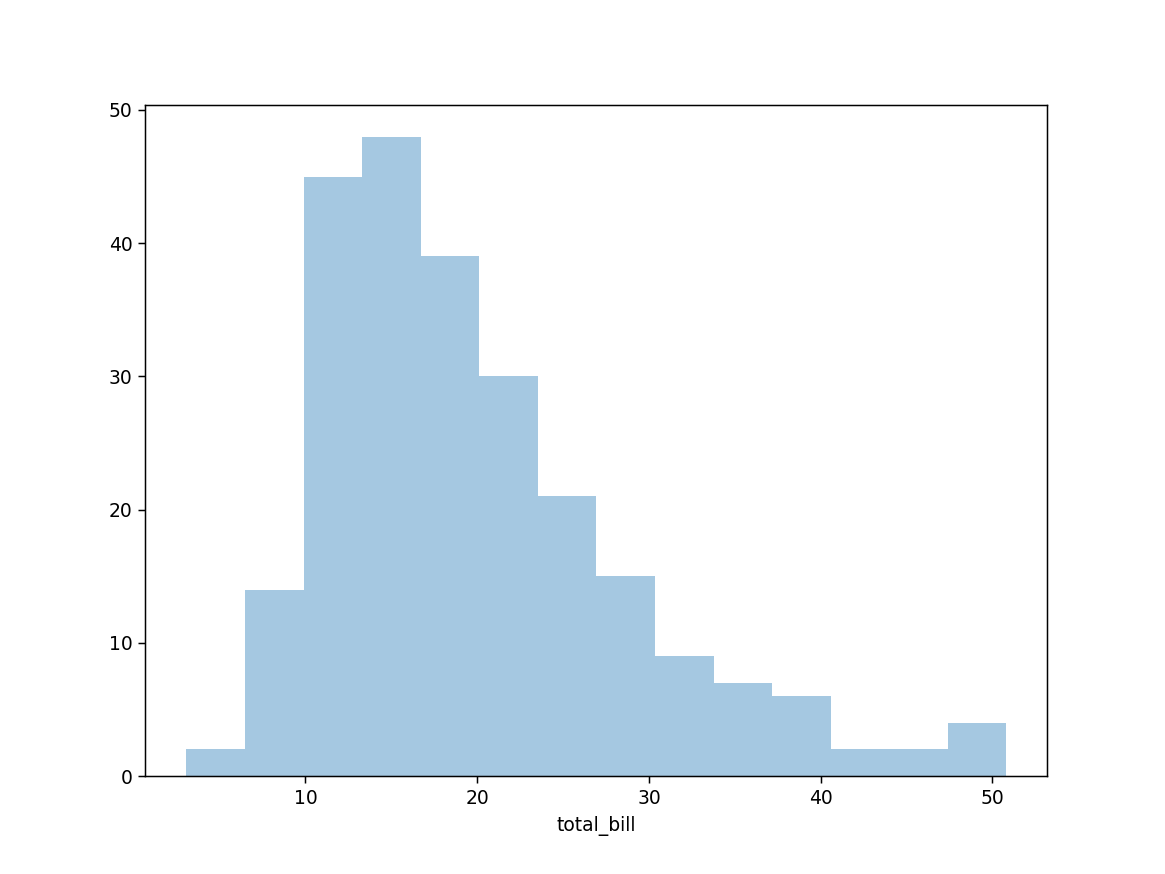

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [40]:
# 밀집도 그래프 제외하고 히스토그램만
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)

<IPython.core.display.Javascript object>


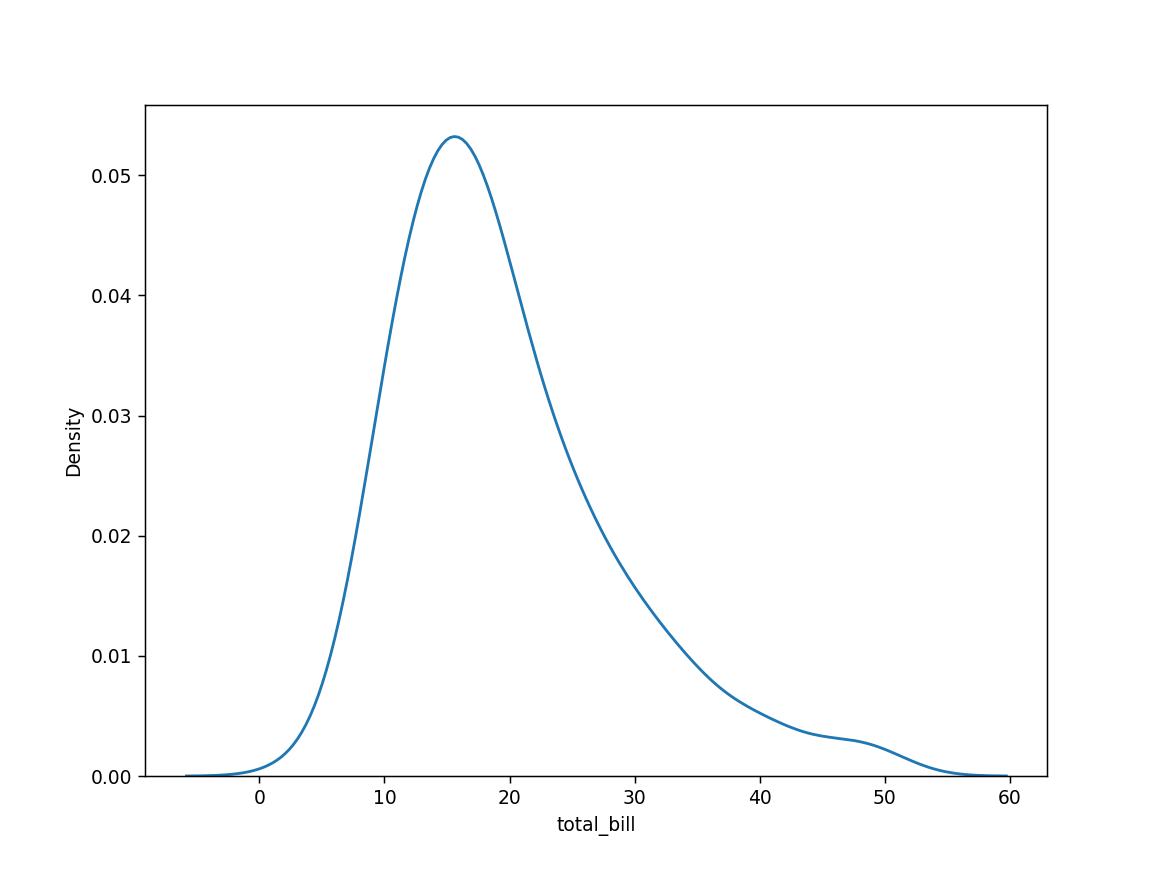

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


In [42]:
# 히스토그램 제외하고 밀집도만
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)

<IPython.core.display.Javascript object>


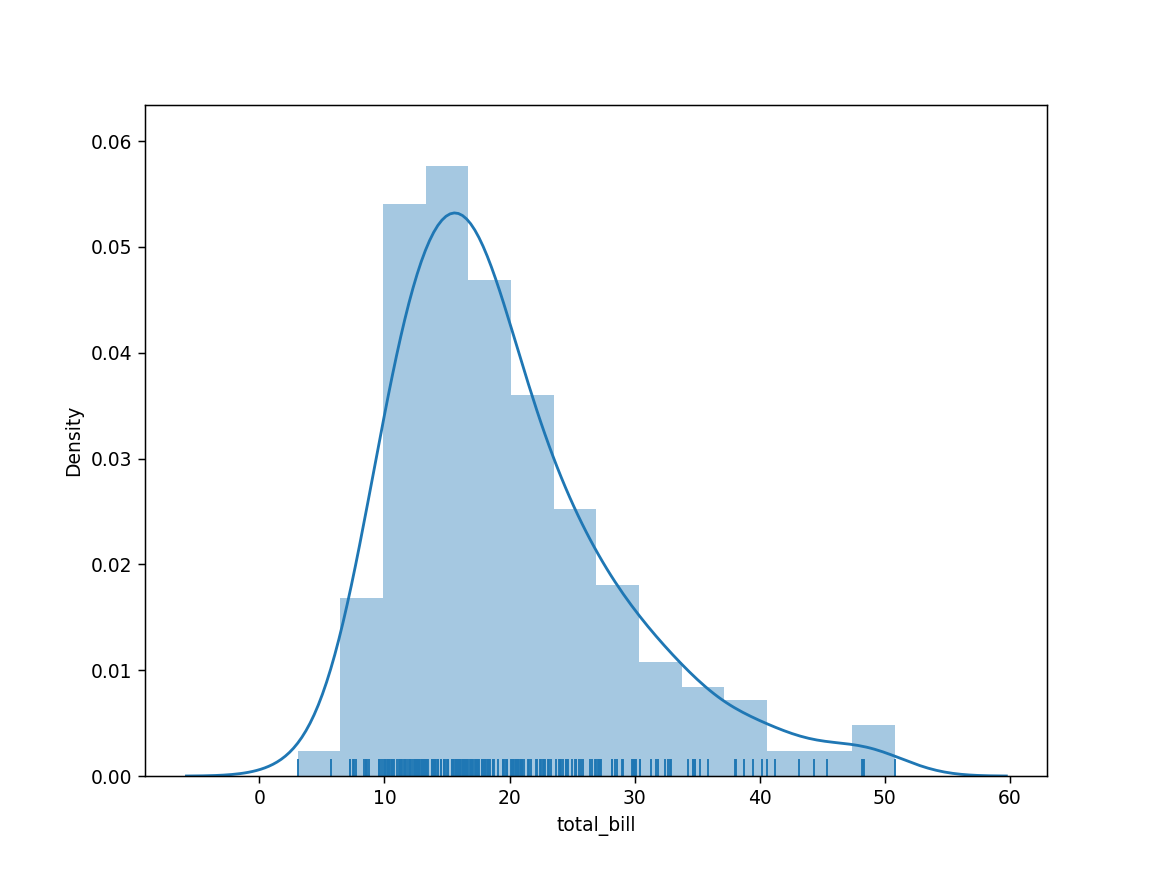

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


In [43]:
# displot 메서드(히스토그램+밀집도) + rug 인자(양탄자 그래프)
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)

<IPython.core.display.Javascript object>


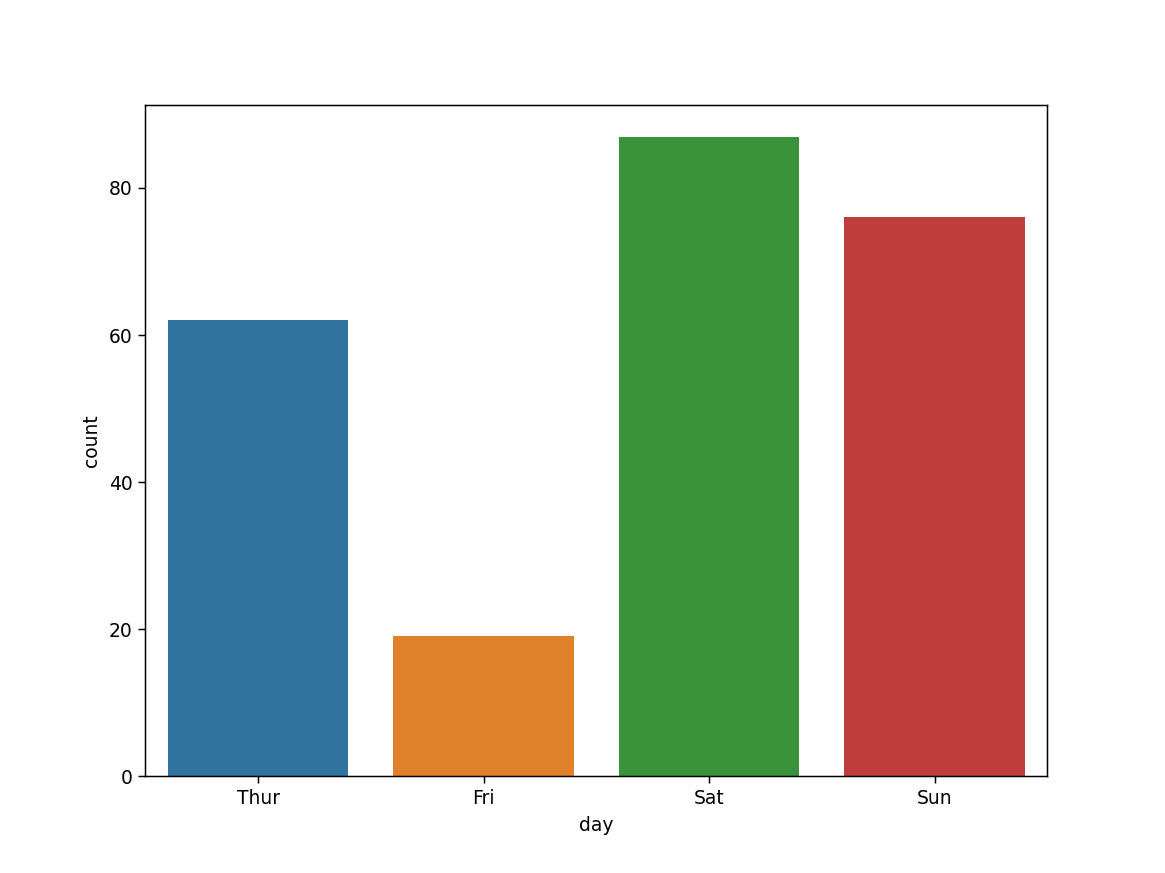

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [44]:
# count 그래프(이산값)
ax = plt.subplots() # 기본 틀
ax = sns.countplot('day', data=tips) # count 그래프

2) 이변량 그래프 - 산점도, 밀집도, 바 그래프, 박스 그래프, 관계 그래프

<IPython.core.display.Javascript object>


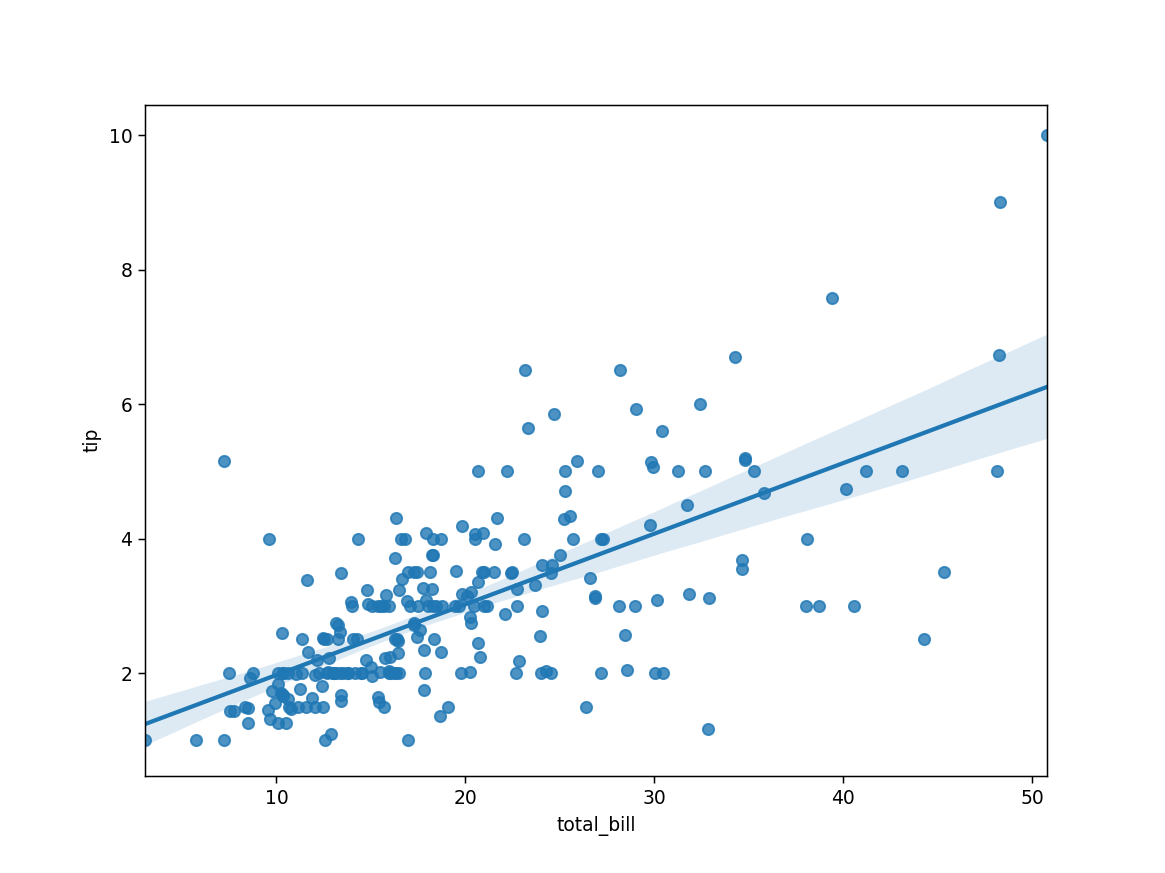

In [45]:
# 산점도 그래프 (+ 회귀선)
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)

<IPython.core.display.Javascript object>


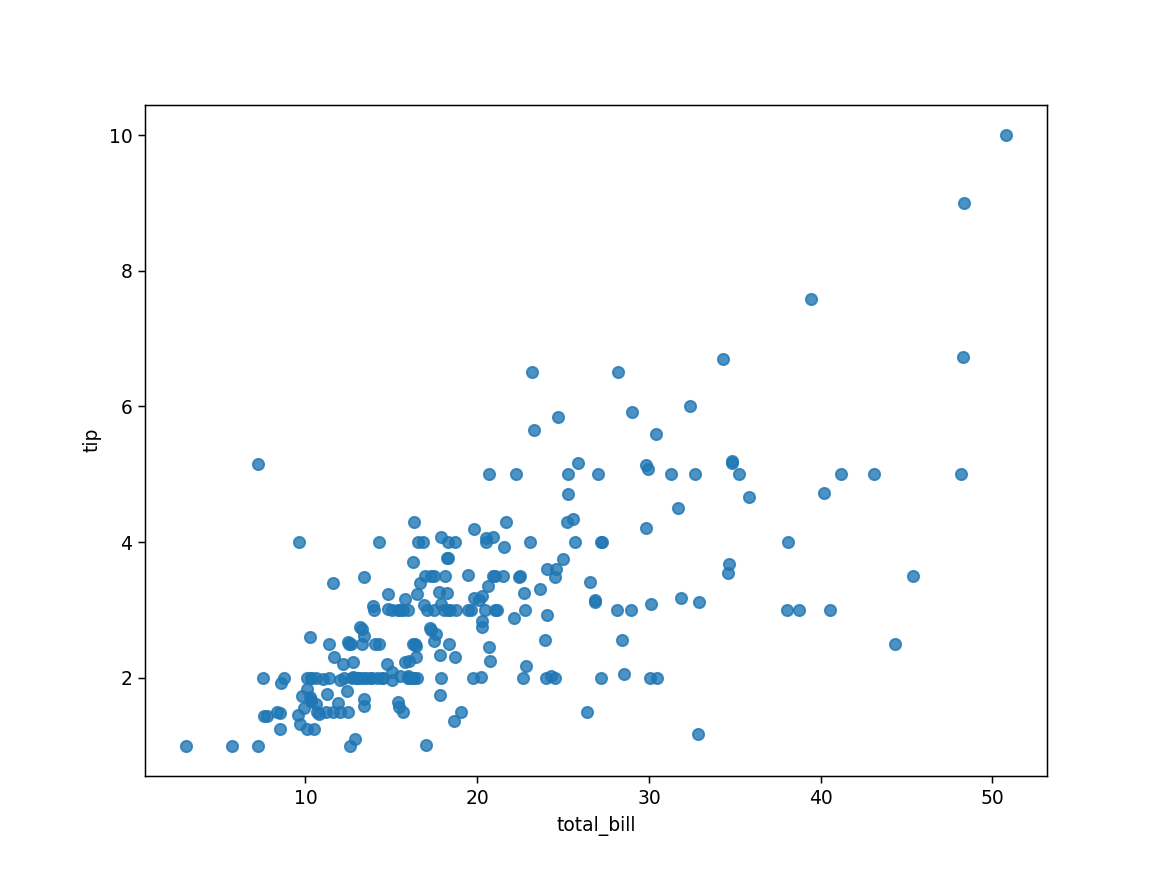

In [46]:
# 산점도 그래프 (회귀선 없이)
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)

<IPython.core.display.Javascript object>


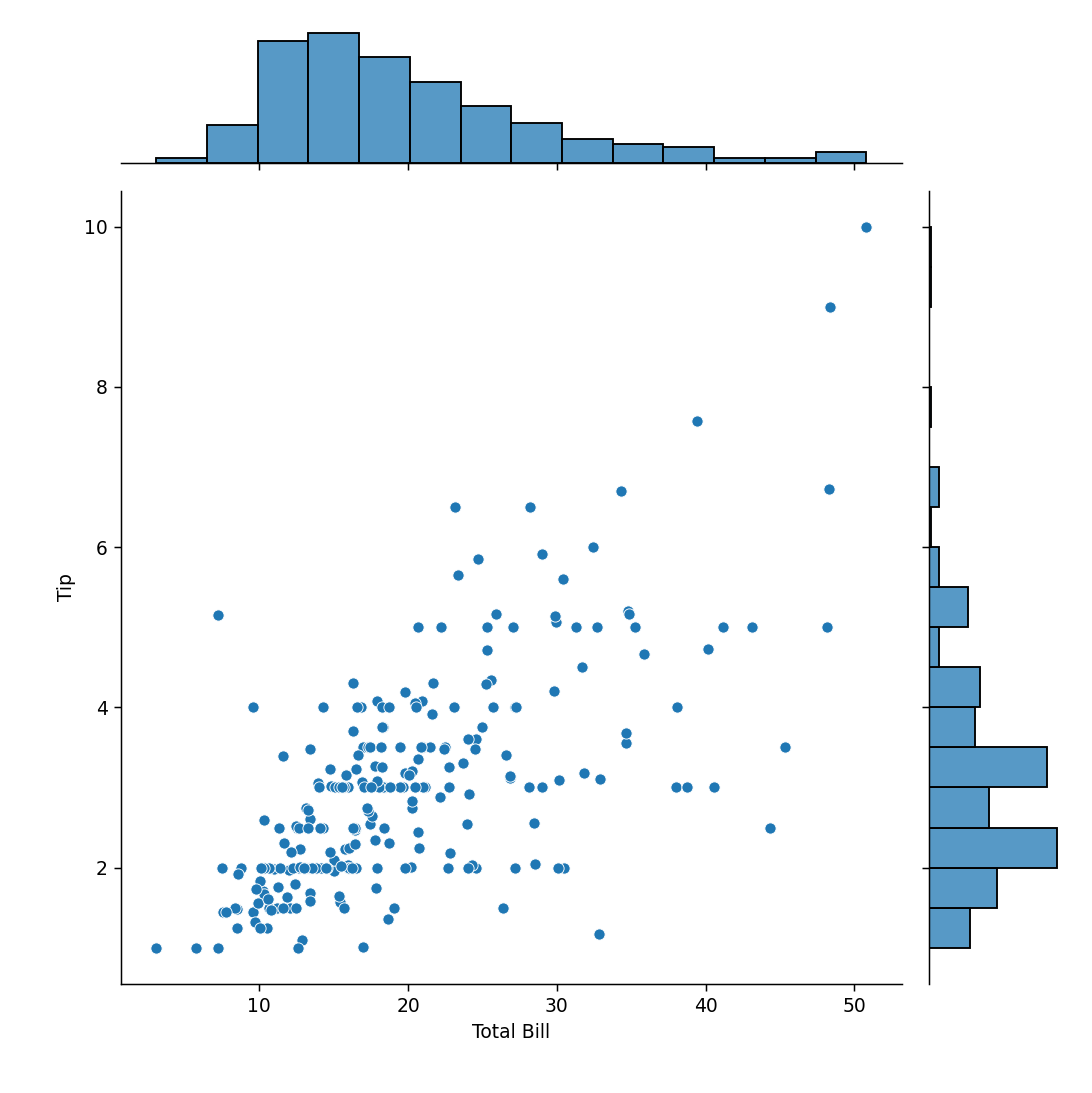

Text(0.5, 1.03, 'Joint Plot Total Bill and Tip')

In [50]:
# 산점도 + 히스토그램
joint = sns.jointplot(x='total_bill', y='tip', data=tips) # joint 그래프 그려주기
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


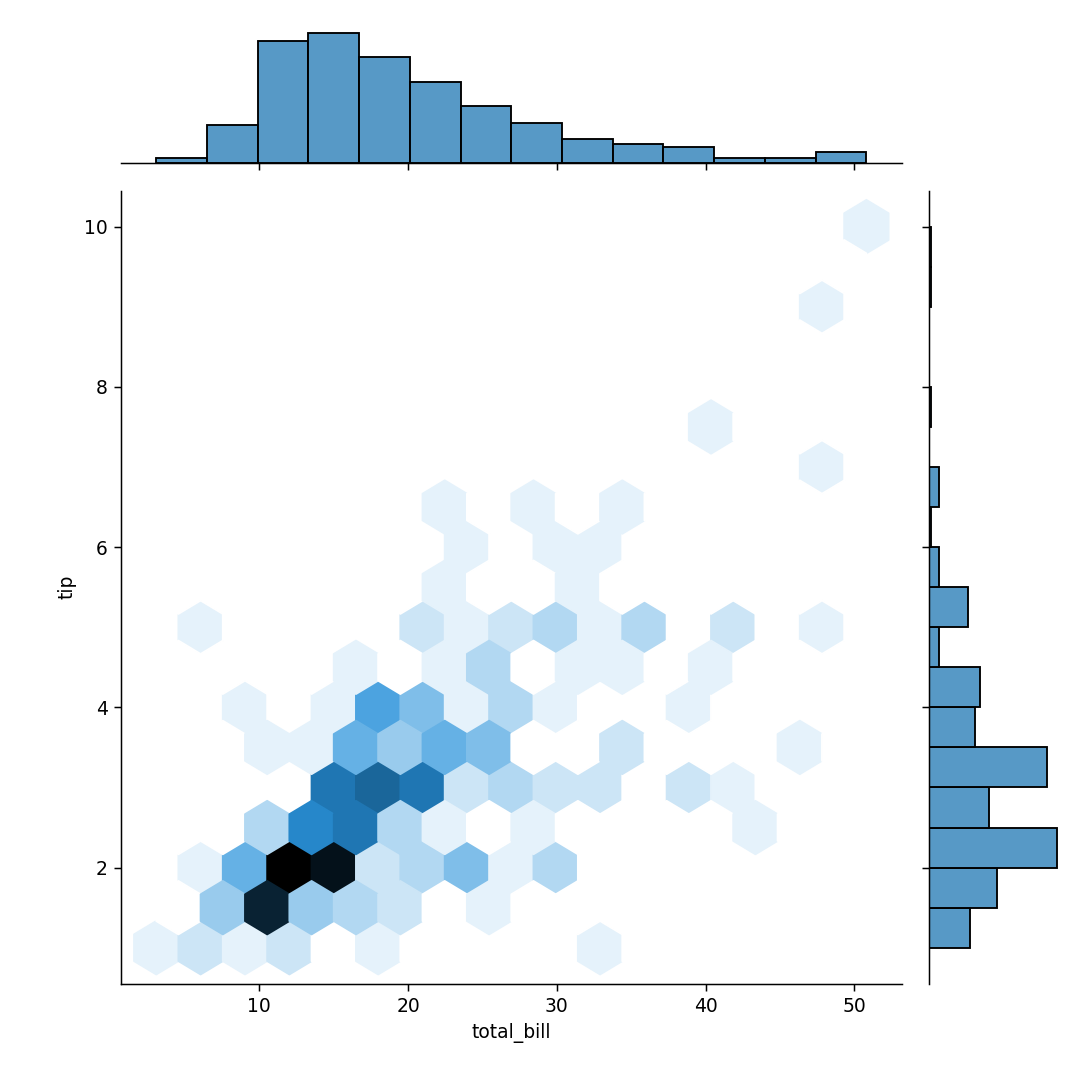

In [51]:
# 육각 그래프 사용
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

<IPython.core.display.Javascript object>


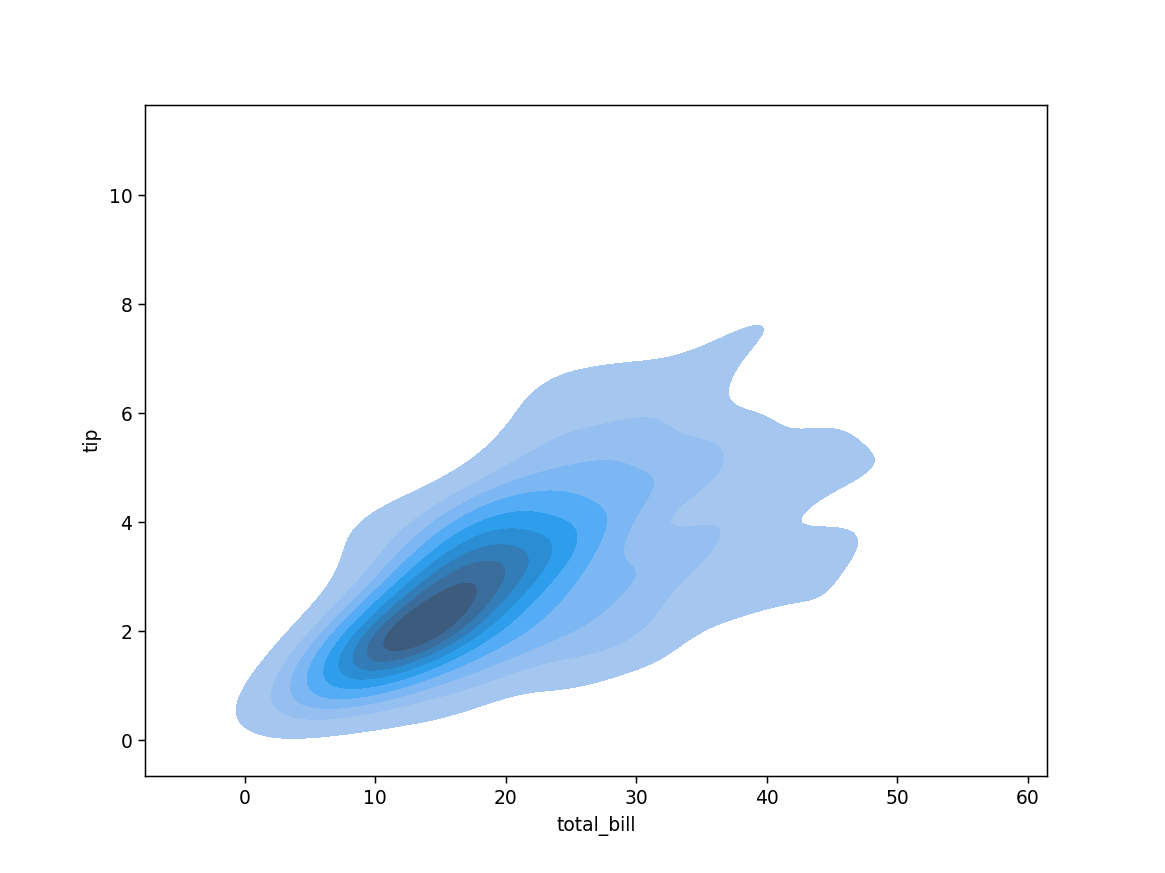

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


In [52]:
# 이차원 밀집도
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2 = tips['tip'],
                shade=True)

<IPython.core.display.Javascript object>


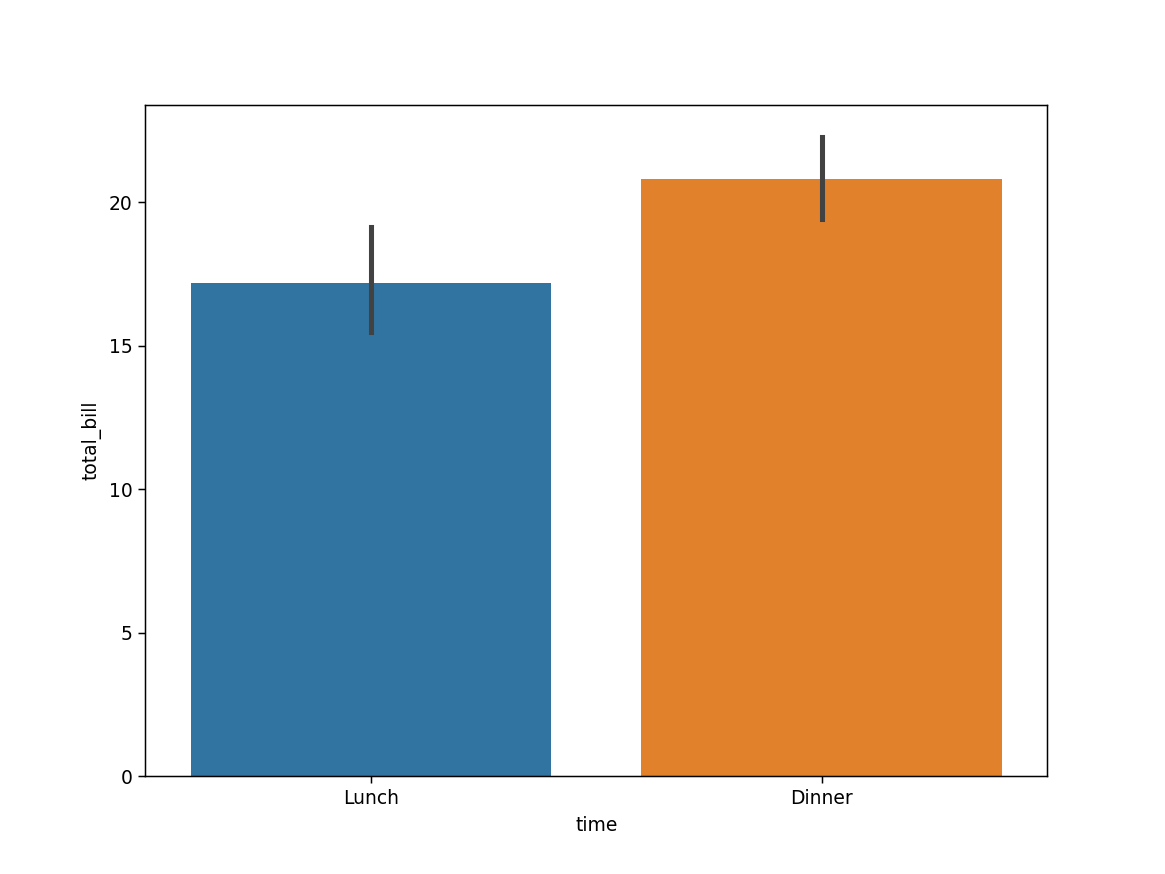

In [53]:
# 바 그래프
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)

<IPython.core.display.Javascript object>


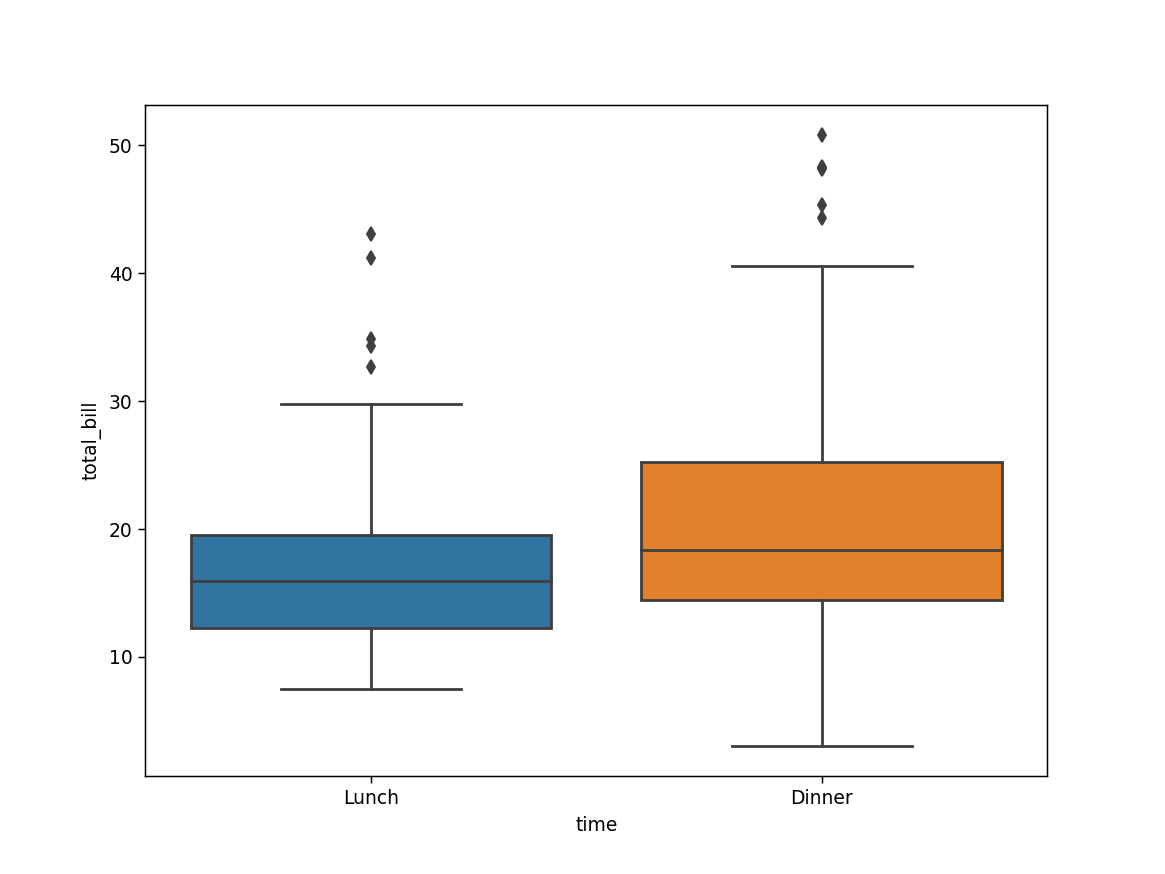

In [54]:
# 박스 그래프
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)

<IPython.core.display.Javascript object>


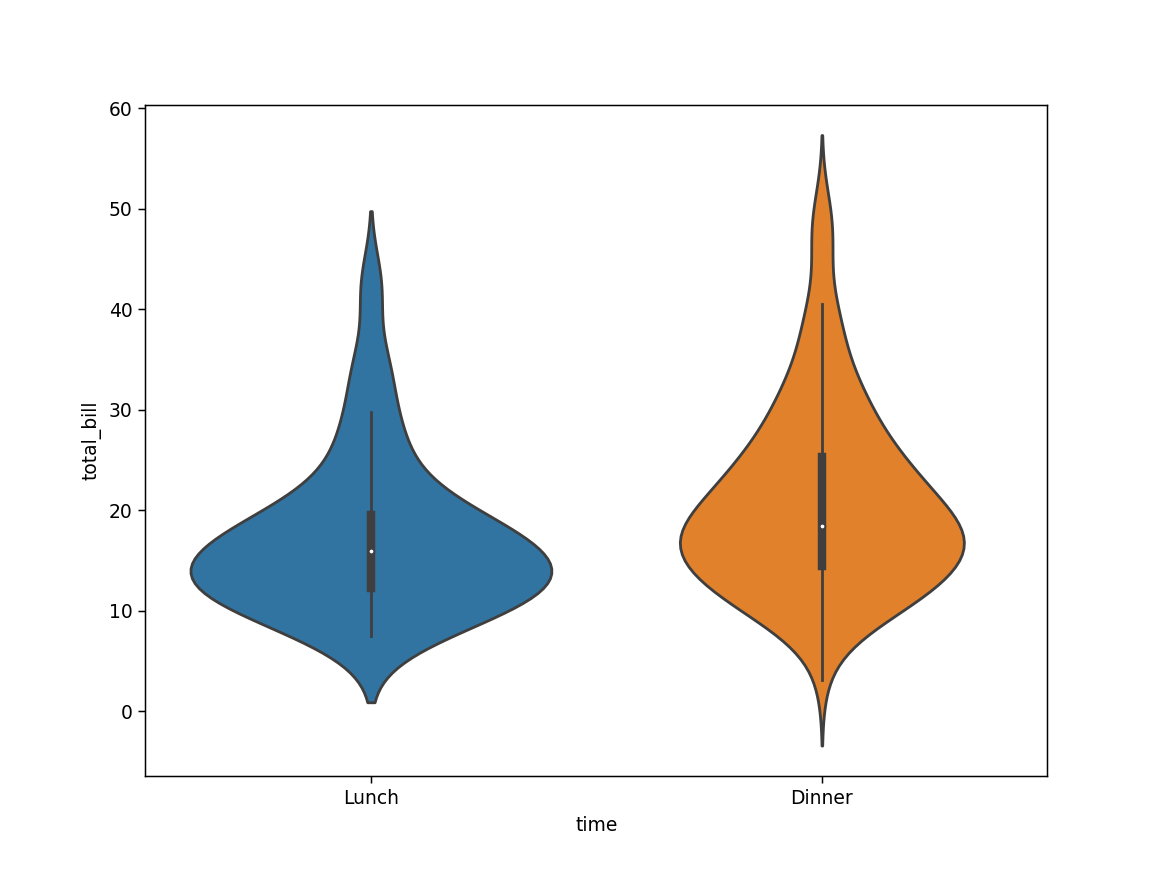

In [55]:
# 바이올린 메서드
ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill', data=tips)

<IPython.core.display.Javascript object>


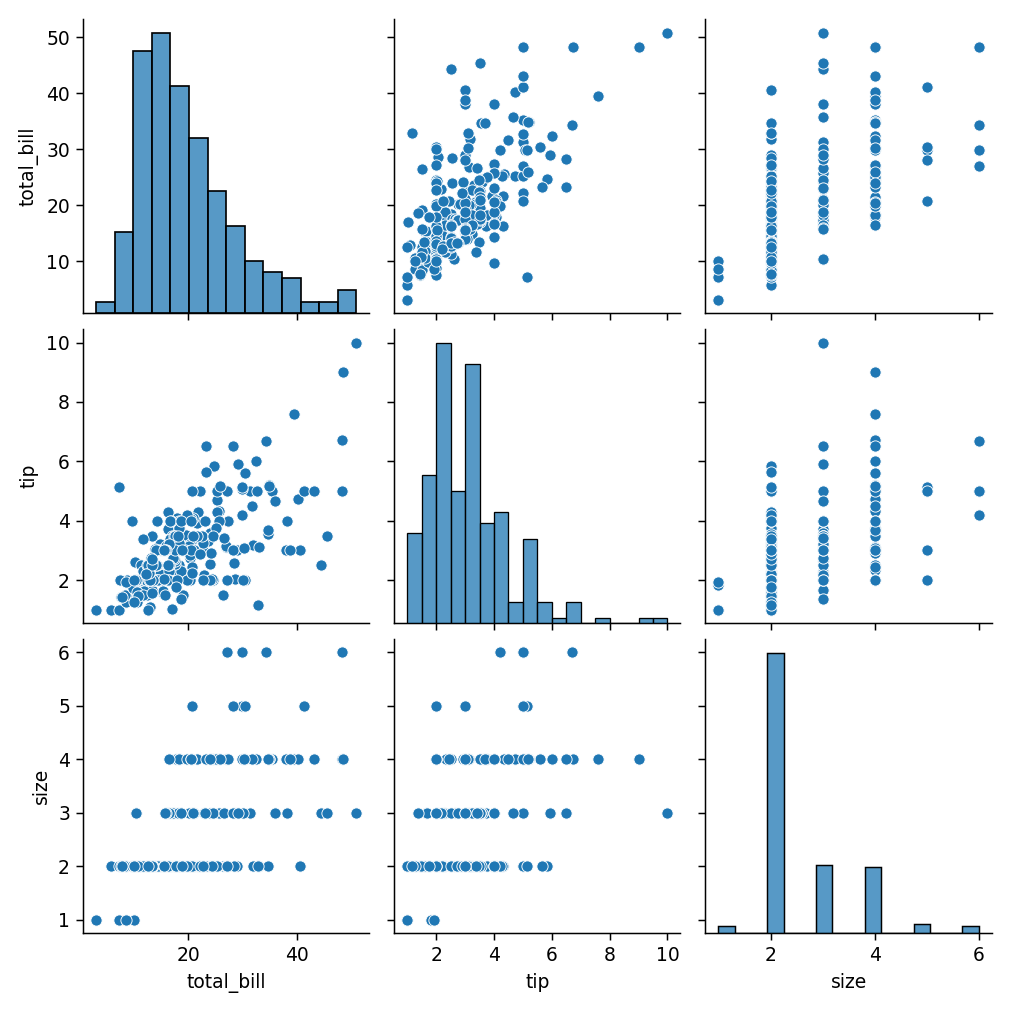

In [56]:
# 관계 그래프
fig = sns.pairplot(tips)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1176: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(len(y_vars), len(x_vars),


<IPython.core.display.Javascript object>


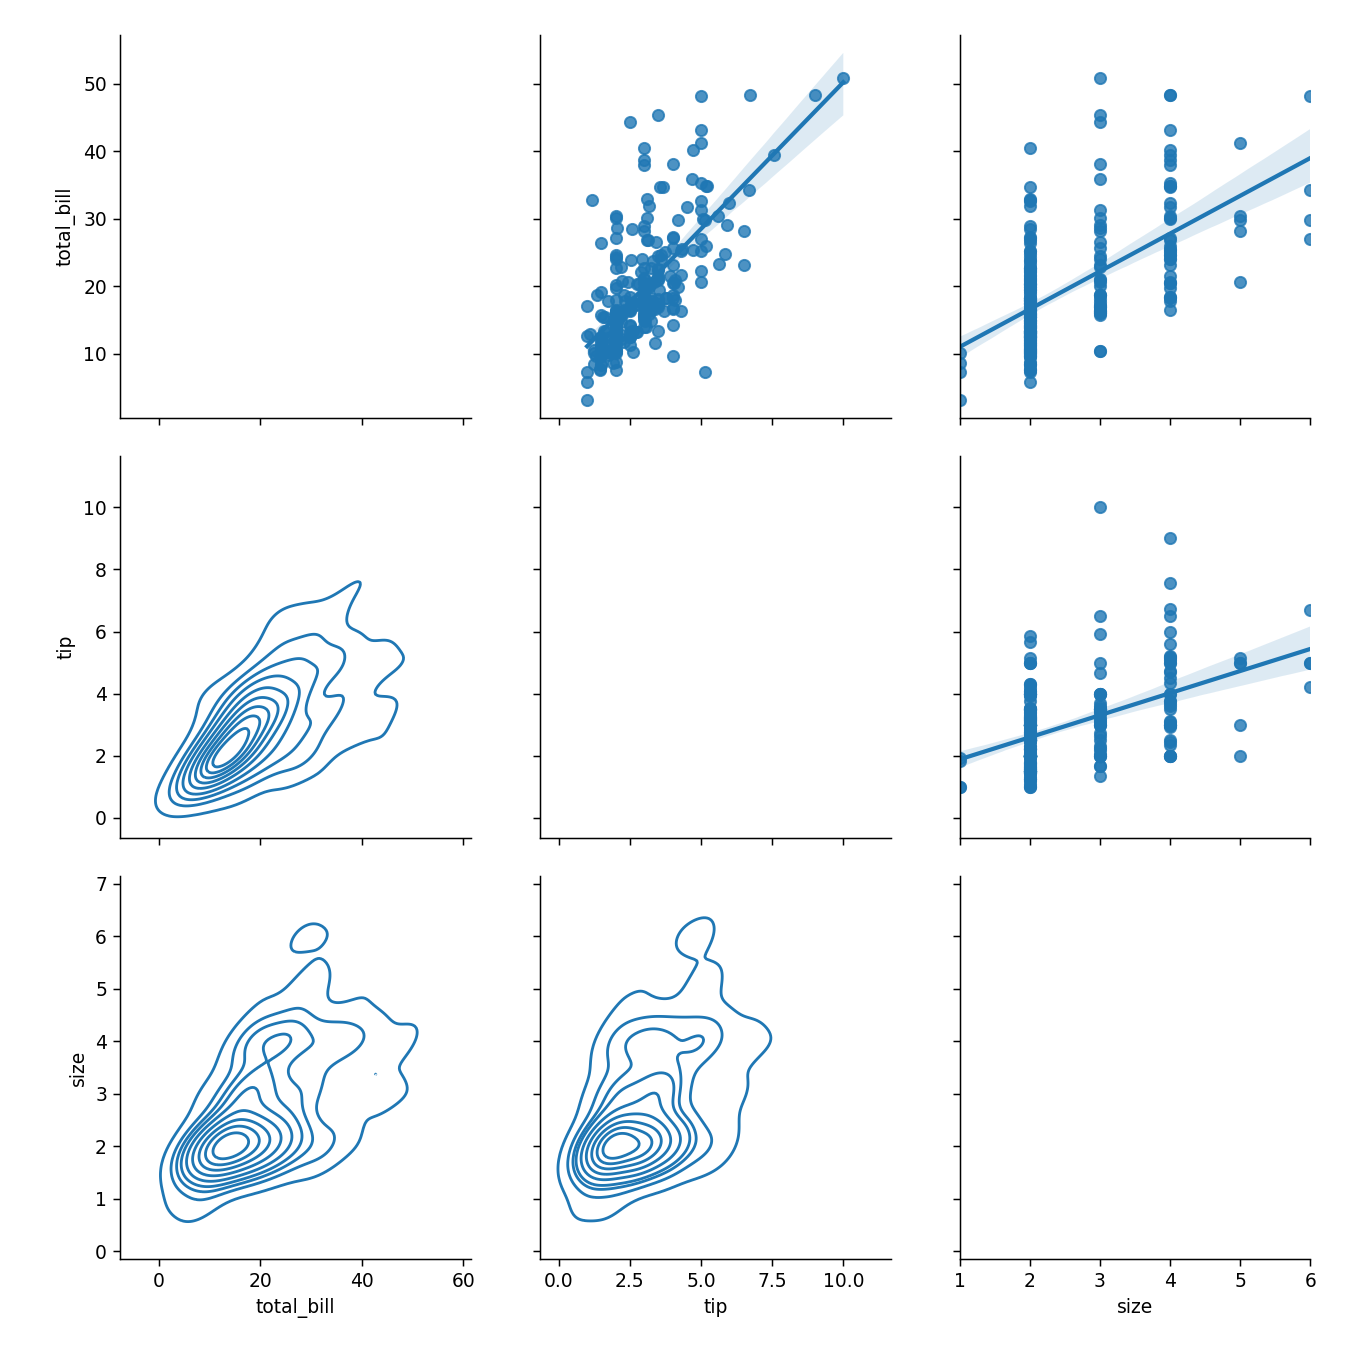

<IPython.core.display.Javascript object>


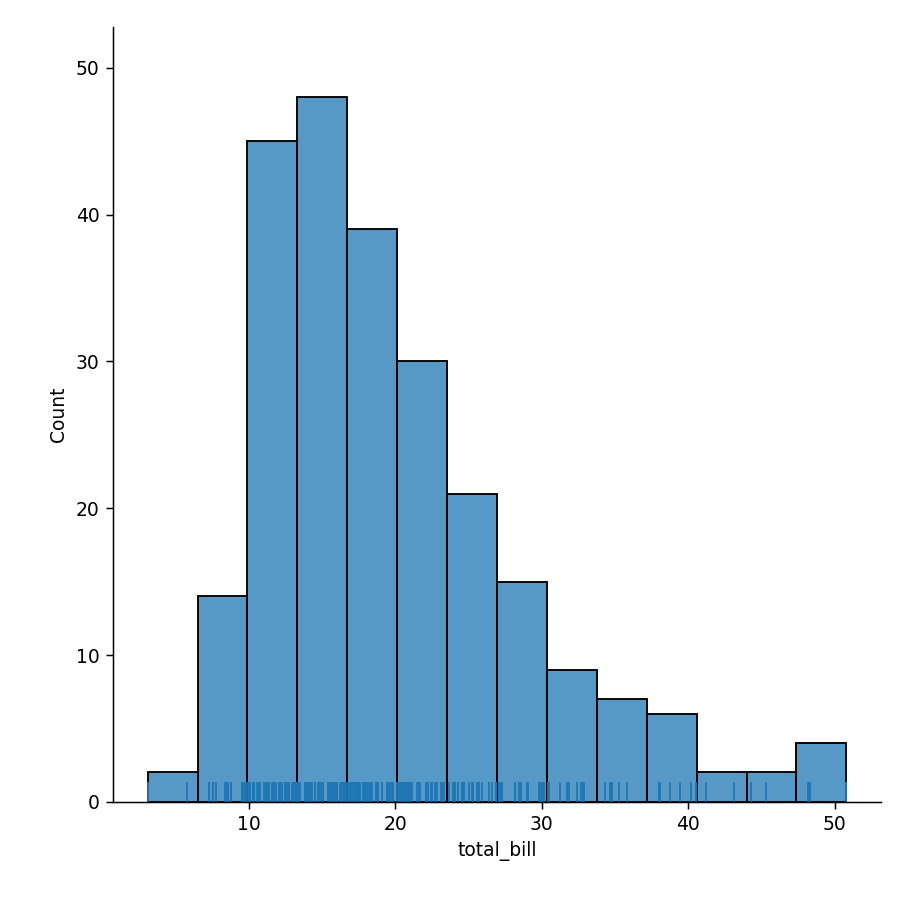

<IPython.core.display.Javascript object>


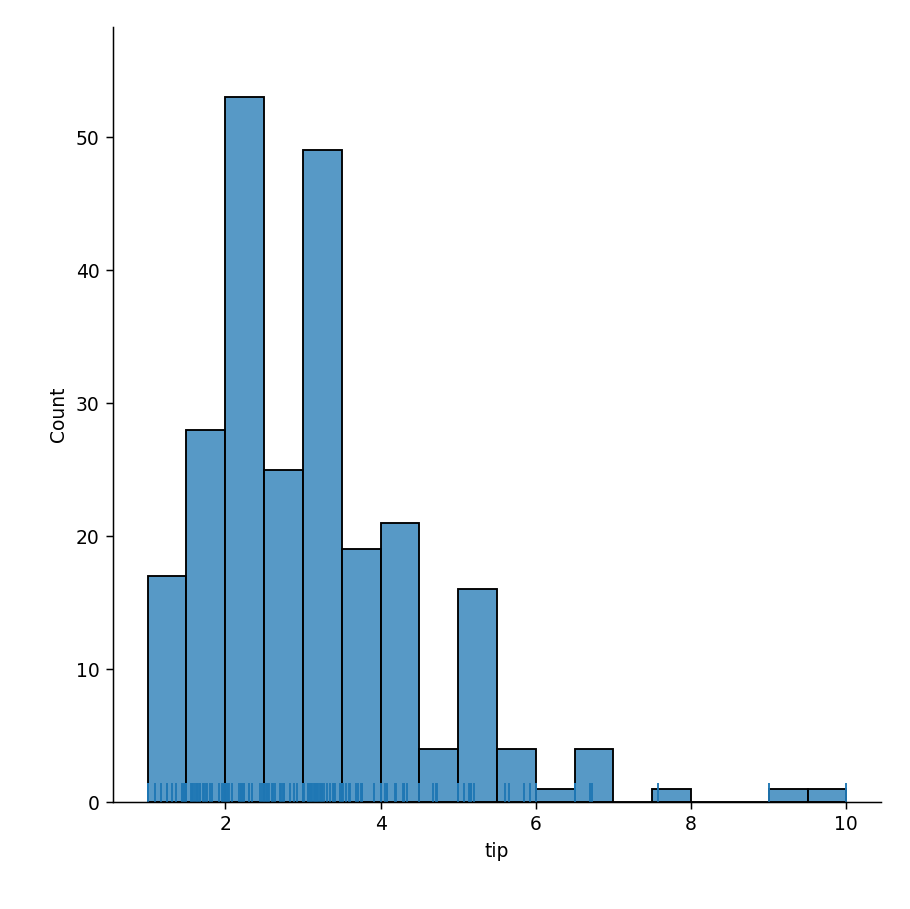

<IPython.core.display.Javascript object>


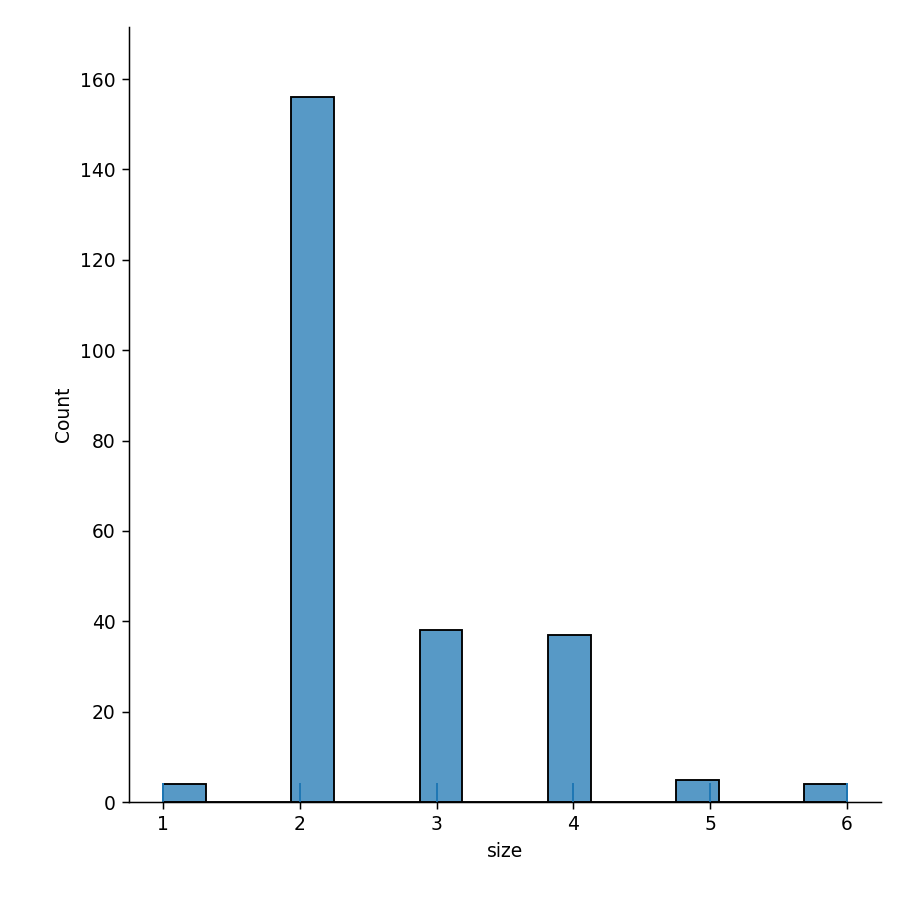

In [59]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.displot, rug=True)
plt.show()